In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
print('pandas versio: ' + pd.__version__)

pandas versio: 1.4.0


In [79]:
%pwd
%cd Sales_Data
%ls

c:\Users\luis-\data Proyects\Sales analisis\Sales_Data
 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: 9C86-EF7F

 Directorio de c:\Users\luis-\data Proyects\Sales analisis\Sales_Data

14/06/2022  10:12 a. m.    <DIR>          .
14/06/2022  10:12 a. m.    <DIR>          ..
14/06/2022  10:12 a. m.        16,415,525 all_data_sales_2019.csv
05/09/2020  12:39 p. m.         1,595,953 Sales_April_2019.csv
05/09/2020  12:39 p. m.         1,043,593 Sales_August_2019.csv
05/09/2020  12:39 p. m.         2,181,642 Sales_December_2019.csv
05/09/2020  12:39 p. m.         1,046,495 Sales_February_2019.csv
05/09/2020  12:39 p. m.           843,098 Sales_January_2019.csv
05/09/2020  12:39 p. m.         1,248,753 Sales_July_2019.csv
05/09/2020  12:39 p. m.         1,182,508 Sales_June_2019.csv
05/09/2020  12:39 p. m.         1,323,497 Sales_March_2019.csv
05/09/2020  12:39 p. m.         1,443,965 Sales_May_2019.csv
05/09/2020  12:39 p. m.         1,534,677 Sales_November_2019.

## merge all data sales

In [150]:
'''os.listdir(path='.'):
Return a list containing the names of the entries in the directory given by path. 
The list is in arbitrary order, and does not include the special entries and even if they are present in the directory. 
'''

#create a list with all data docs 
path = 'c:\\Users\\luis-\\data Proyects\\Sales analisis\\Sales_Data'
files = os.listdir(path) 

#create a empty dataframe
all_data = pd.DataFrame()



for file in files:
    df = pd.read_csv('c:\\Users\\luis-\\data Proyects\\Sales analisis\\Sales_Data\\' + file)
    all_data = pd.concat([all_data, df])
    
#save as .csv file
all_data.to_csv('all_data_sales_2019.csv', index= False)


In [64]:
sales_2019 = pd.read_csv('all_data_sales_2019.csv')  
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [59]:
#the dimencion of the new dataframe  
sales_2019.shape

(186850, 6)

In [69]:
#how many NA values are there  
sales_2019.isna().sum()

In [72]:
#drop the rows with na dates
sales_2019.dropna(inplace=True)

In [70]:
'''we need convert the column 'Date Order' in datetime type, 
'Price Eacch in numeric type'
'Quantity order' in numeric type 
and 'Purchase Address' in string 

'''

sales_2019['Order Date']= pd.to_datetime(sales_2019['Order Date'], errors= 'coerce')
sales_2019['Price Each']= pd.to_numeric(sales_2019['Price Each'])
sales_2019['Quantity Ordered']= pd.to_numeric(sales_2019['Quantity Ordered'])
sales_2019['Purchase Address']= sales_2019['Purchase Address'].astype('string')



In [74]:
#the correct type in columns 
sales_2019.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            string
dtype: object

In [81]:
#create a new month column 
sales_2019['month'] = sales_2019['Order Date'].dt.month
sales_2019['month']

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: month, Length: 185950, dtype: int64

In [82]:
sales_2019.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
152305,293306,Bose SoundSport Headphones,1,99.99,2019-11-16 21:43:00,"655 11th St, San Francisco, CA 94016",11
74597,147941,Macbook Pro Laptop,1,1700.00,2019-01-24 22:16:00,"234 Wilson St, New York City, NY 10001",1
127707,200948,USB-C Charging Cable,1,11.95,2019-05-19 11:00:00,"81 Hill St, Los Angeles, CA 90001",5
132560,205573,USB-C Charging Cable,3,11.95,2019-05-25 19:08:00,"541 Forest St, New York City, NY 10001",5
178689,251534,USB-C Charging Cable,1,11.95,2019-09-30 11:10:00,"437 Cherry St, Los Angeles, CA 90001",9
133850,206798,Apple Airpods Headphones,1,150.00,2019-05-05 06:03:00,"50 Madison St, Austin, TX 73301",5
161913,266162,Apple Airpods Headphones,1,150.00,2019-10-31 22:18:00,"475 Church St, Dallas, TX 75001",10
69697,143272,Macbook Pro Laptop,1,1700.00,2019-01-14 12:58:00,"526 Spruce St, San Francisco, CA 94016",1
100932,218777,AAA Batteries (4-pack),1,2.99,2019-06-15 10:39:00,"107 Lake St, Boston, MA 02215",6
84924,230226,Bose SoundSport Headphones,1,99.99,2019-07-20 09:00:00,"788 Walnut St, Portland, ME 04101",7


## What was the best  month sor sales??


In [83]:
#dataframe with 
sales_2019.groupby(['month'])[['Price Each']].sum().sort_values(by =['Price Each'],ascending=False)

,Price Each
month,
12,4588415.41
10,3715554.83
4,3367671.02
11,3180600.68
5,3135125.13
3,2791207.83
7,2632539.56
6,2562025.61
8,2230345.42


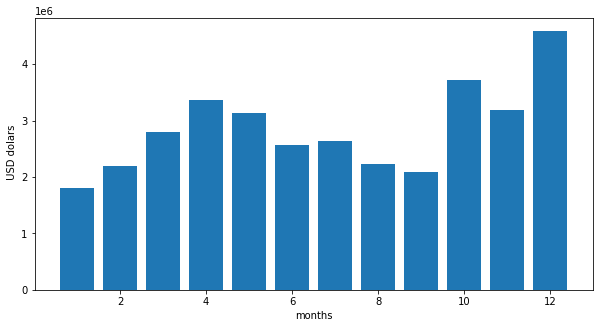

In [110]:
result = sales_2019.groupby(['month'])[['Price Each']].sum()
months = range(1,13)


plt.figure(figsize=(10,5))
plt.bar(months, result['Price Each'])
plt.xlabel('months')
plt.ylabel(' USD dolars')

plt.show()


## add the city an states colum

In [149]:
sales_2019['city'] = sales_2019['Purchase Address'].apply(lambda x: x.split(',')[1])
sales_2019['states'] = sales_2019['Purchase Address'].apply(lambda x: x.split(',')[2][:3])
sales_2019['sales in USD$'] = sales_2019['Quantity Ordered']*sales_2019['Price Each']

sales_2019[['city', 'states']]

,city,states
0,Dallas,TX
2,Boston,MA
3,Los Angeles,CA
4,Los Angeles,CA
5,Los Angeles,CA
...,...,...
186845,Los Angeles,CA
186846,San Francisco,CA
186847,San Francisco,CA
186848,San Francisco,CA


In [86]:
sales_2019.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,states,sales in USD$
84359,229687,ThinkPad Laptop,1,999.99,2019-07-26 08:45:00,"138 Willow St, Dallas, TX 75001",7,Dallas,TX,999.99
171890,275670,27in 4K Gaming Monitor,1,389.99,2019-10-26 09:56:00,"491 Elm St, New York City, NY 10001",10,New York City,NY,389.99
177724,250606,Lightning Charging Cable,1,14.95,2019-09-08 20:50:00,"504 11th St, New York City, NY 10001",9,New York City,NY,14.95
158572,262967,Lightning Charging Cable,1,14.95,2019-10-11 13:26:00,"568 14th St, Los Angeles, CA 90001",10,Los Angeles,CA,14.95
181591,254311,iPhone,1,700.00,2019-09-09 18:49:00,"907 6th St, San Francisco, CA 94016",9,San Francisco,CA,700.00
141763,283239,Apple Airpods Headphones,1,150.00,2019-11-22 12:32:00,"46 Adams St, New York City, NY 10001",11,New York City,NY,150.00
142292,283737,AA Batteries (4-pack),2,3.84,2019-11-25 23:16:00,"117 Elm St, New York City, NY 10001",11,New York City,NY,7.68
186087,258633,Macbook Pro Laptop,1,1700.00,2019-09-24 06:57:00,"61 Washington St, Boston, MA 02215",9,Boston,MA,1700.00
101647,219457,iPhone,1,700.00,2019-06-18 08:20:00,"543 Johnson St, Dallas, TX 75001",6,Dallas,TX,700.00
176312,249256,AA Batteries (4-pack),1,3.84,2019-09-11 10:51:00,"503 7th St, Austin, TX 73301",9,Austin,TX,3.84


## What city hat the highest  number of sales 

In [87]:
top_10_citys = sales_2019.groupby(['city','states']).sum().sort_values(by=['sales in USD$'], ascending=False).head(10)
top_10_citys

,,Quantity Ordered,Price Each,month,sales in USD$
city,states,,,,
San Francisco,CA,50239,8211461.74,315520,8262203.91
Los Angeles,CA,33289,5421435.23,208325,5452570.80
New York City,NY,27932,4635370.83,175741,4664317.43
Boston,MA,22528,3637409.77,141112,3661642.01
Atlanta,GA,16602,2779908.20,104794,2795498.58
Dallas,TX,16730,2752627.82,104620,2767975.40
Seattle,WA,16553,2733296.01,104941,2747755.48
Portland,OR,11303,1860558.22,70621,1870732.34
Austin,TX,11153,1809873.61,69829,1819581.75


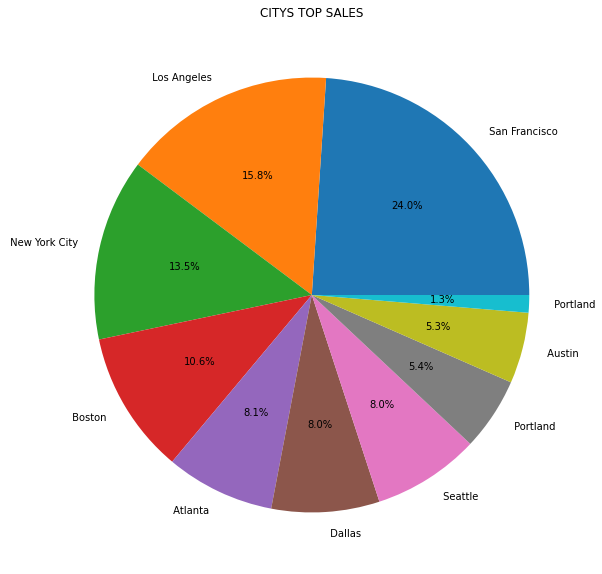

In [148]:
citys = list(top_10_citys.reset_index()['city'])  #x axis
citys_10_sales = list(top_10_citys['sales in USD$'])   #y axis

fig, ax1= plt.subplots( figsize=(10,10))
ax1.pie(citys_10_sales, labels=citys, autopct='%1.1f%%')
ax1.set_title("CITYS TOP SALES")

plt.show()

## what time should we display advertisements to maximize likehood of customers buyin product?

In [111]:
sales_2019['hour'] = sales_2019['Order Date'].dt.hour.astype('category')

In [112]:
top_hour_sales = sales_2019.groupby(['hour']).sum()
sales_2019.groupby(['hour']).sum().sort_values(by=['sales in USD$'], ascending=False)

,Quantity Ordered,Price Each,month,sales in USD$
hour,,,,
19,14470,2398588.31,91389,2412938.54
12,14202,2299876.68,89161,2316821.34
11,14005,2288855.18,87654,2300610.24
20,13768,2268185.16,86375,2281716.24
18,13802,2207696.93,86421,2219348.30
13,13685,2139743.86,85808,2155389.80
17,12229,2116777.02,77454,2129361.61
14,12362,2072194.77,77836,2083672.73
21,12244,2030763.83,77103,2042000.86


#### the best hour for sales is 12:00 and 19:00  

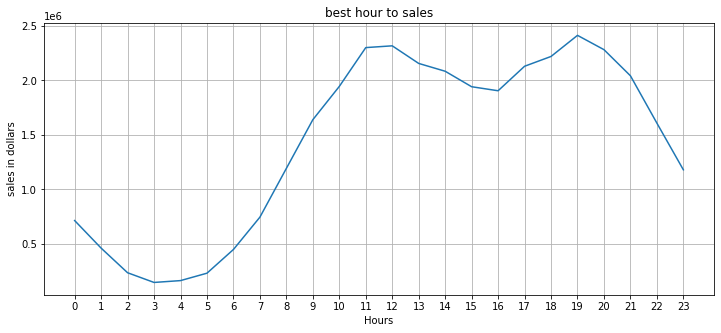

In [132]:
hour_sales = list(top_hour_sales['sales in USD$'])

fig, ax1 = plt.subplots(1,1, figsize=(12,5))
ax1.plot(range(24), hour_sales,)
ax1.set_title("best hour to sales")
ax1.set_xlabel("Hours")
ax1.set_ylabel("sales in dollars")
plt.xticks(range(24))
ax1.grid()

plt.show()


## what product are most often sold together

In [140]:
df1 =sales_2019[sales_2019['Order ID'].duplicated(keep=False)]
df1['Grouper'] = df1.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouper']]
df1.head()

C:\Users\luis-\AppData\Local\Temp\ipykernel_16036\1759067819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouper'] = df1.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouper
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


## What product sold the most? 

In [138]:
#dataframe whit most sold products
top_products = sales_2019.groupby(['Product']).sum().sort_values(by=['Quantity Ordered'], ascending=False)
top_products.drop(columns=['Price Each', 'month'], inplace=True)

top_products



,Quantity Ordered,sales in USD$
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
27in FHD Monitor,7550,1132424.50
iPhone,6849,4794300.00


In [151]:
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,states,sales in USD$,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9


In [152]:
#create new .csv file to used with tableur
sales_2019.to_csv('sales_2019_TABLEAU.csv', index= False)

In [156]:
sales_2019['city'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: city, dtype: int64